[*********************100%***********************]  1 of 1 completed


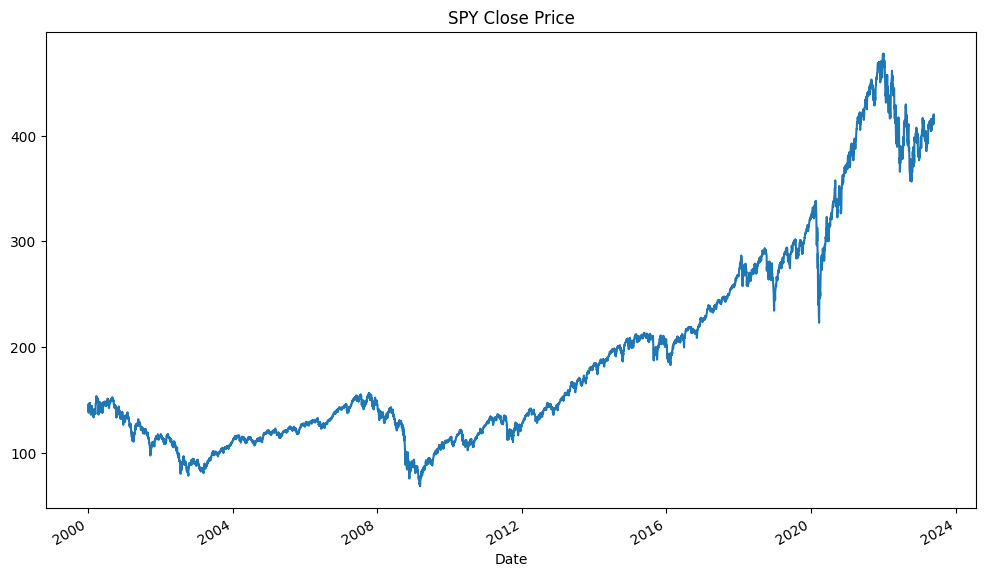

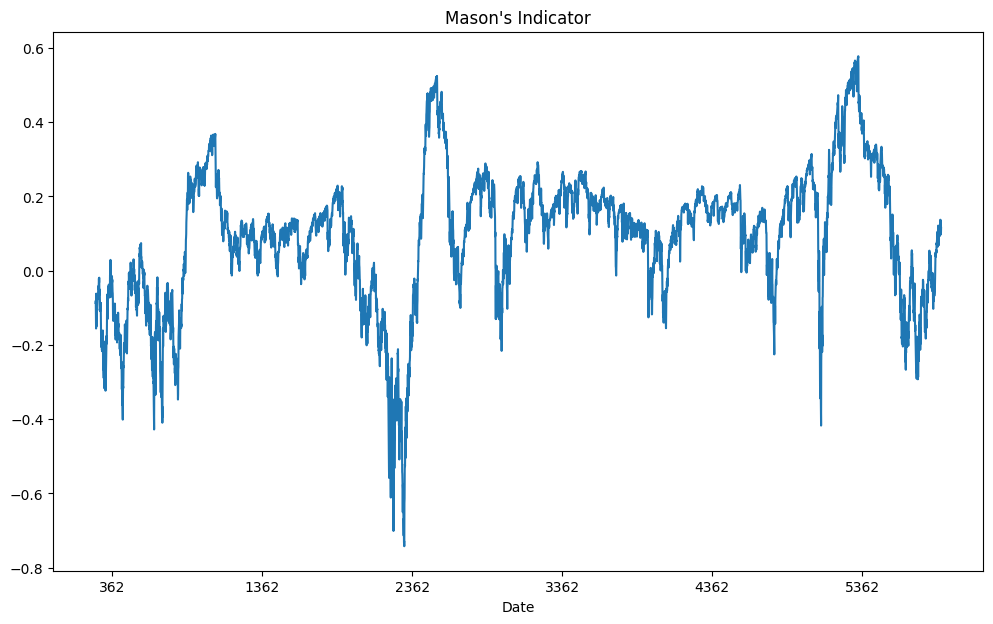

In [1]:
# Step 1: Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Download SPY data
spy_data = yf.download('SPY', start='2000-01-01', end='2023-05-29')

# Step 3: Plot Close price data
spy_data['Close'].plot(title='SPY Close Price', figsize=(12, 7))
plt.show()

# Step 4: Create Mason's indicator
def calculate_masons(data, win=250):
    data['masons'] = np.nan
    for k in range(win, len(data)):
        PX = data.iloc[k-win:k]['Close'].values

        Min = np.inf
        Max = 0
        utility = 0
        for i in range(win):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))

            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
            
        data.at[k, 'masons'] = utility / win
        
    return data

# Step 5: Apply Mason's indicator to SPY data
spy_data = calculate_masons(spy_data)

# Step 6: Plot Mason's indicator
spy_data['masons'].plot(title="Mason's Indicator", figsize=(12, 7))
plt.show()